In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
important_genes = pd.read_csv("./data/prior_knowledge/radiation_genes.txt", sep=' ', header=None)
important_genes = important_genes.iloc[:,0].values
print(important_genes)

['TP53' 'MYC' 'FOS' 'BCL2' 'NFYB' 'E2F4' 'B2M' 'EGR2' 'CDKN1A' 'GADD45A'
 'ATM' 'ATR' 'SOD2' 'GPX1' 'HMOX1' 'BAX' 'CASP3' 'ILB' 'IL6' 'IL8' 'IL33'
 'TNF' 'TNFAIP3' 'TNF-alpha' 'NFKB1' 'EGR1' 'RAD51' 'MDM2' 'XPC' 'DDB2'
 'TGF-beta-1' 'CXCL2' 'CXCL3' 'CXCL4' 'GDF15' 'FDXR' 'FAS' 'PTGS2' 'FGF2'
 'POU5F1' 'MMP1' 'MMP3' 'DKK1' 'SERPINB2' 'IL1A' 'IL1B' 'LIF' 'MMP10'
 'ATF3' 'BCL2A1' 'MT1E' 'KDM5B' 'BMP2' 'KYNU' 'LAMB3' 'ETS1']


(108, 11898) 6561


Text(0.5, 0, 'Variance')

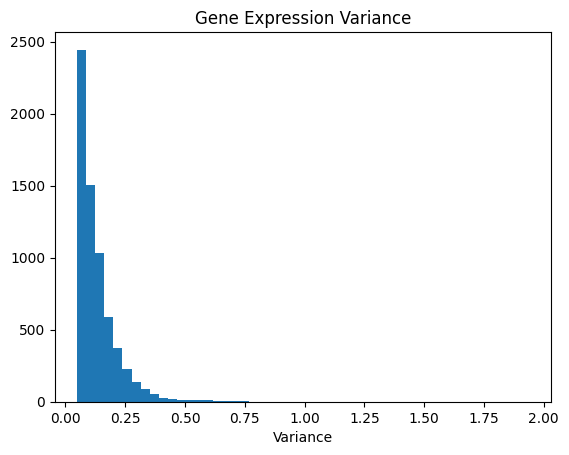

In [3]:
# Load gene epxression 
celltype='rpe1_experiment2'
df = pd.read_csv(f"data/{celltype}/cd_tpm_matrix_combined_dose_rate.csv", header=0)
X = df.to_numpy()
variance = np.var(np.log1p(X),axis=0)
print(X.shape, len(variance[variance>0.05]))
filtered_inds = np.where(variance>0.05)
filtered_genes = df.columns[filtered_inds]
plt.hist(variance[variance>0.05], bins=50)
plt.title("Gene Expression Variance")
plt.xlabel("Variance")

In [4]:
print(filtered_genes)

Index(['LOC107984262', 'TNC', 'TSR3', 'PNISR', 'LTO1', 'BLOC1S6', 'TELO2',
       'SF3A2', 'ANKRD17', 'LOC100287036',
       ...
       'B3GNT9', 'KCTD13-DT', 'TMEM242-DT', 'EMC4', 'TSSK3', 'RNASEH2C',
       'SNX22', 'NHERF2', 'TUFM', 'CTXN1'],
      dtype='object', length=6561)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
celltypes = ['rpe1_experiment2']
#doses=['A', 'B', 'C', 'D', 'E']
doses= ["d0", "dF", "dG", "dH", "dI", "dJ"]
dose_rate = [0, 0.004, 0.04, 0.4, 4, 8]
#dose_rate = [0.001, 0.01, 0.1, 1, 2]
colors = ['red', 'blue', 'green', 'yellow', 'black']
dfs_first_subset_by_dose = []
intersection_de_genes = set(df.columns)
dose_labels = []
for c in celltypes:
    for i, d in enumerate(doses):
        df = pd.read_csv(f"data/{c}/cd_tpm_matrix_d{d}.csv") if c == 'rpe1' else pd.read_csv(f"data/{c}/cd_matrix_d{d}.csv") 
        # remove controls
        df = df.loc[df['radiation'] != 0]
        df['dose_rate'] = df.shape[0]*[dose_rate[i]]
        dose_labels+= df.shape[0]*[colors[i]]
        # Load curated partition, add radiation to each subset
        # with open(f"./data/{celltype}/cd_partition_d{d}_new.pickle", 'rb') as f:
        #     custom_partition = pickle.load(f)
        # df_first_subset = df[custom_partition[0]]
        intersection_de_genes = intersection_de_genes.intersection(set(list(df.columns)))
        # dfs_first_subset_by_dose.append(df_first_subset)
        dfs_first_subset_by_dose.append(df)
#intersection_de_genes.remove('radiation')
# [intersection_de_genes.add(gene) for gene in important_genes]
print(intersection_de_genes)
dfs_first_subset_by_dose = [d[list(intersection_de_genes)] for d in dfs_first_subset_by_dose]
df_joined =pd.concat(dfs_first_subset_by_dose, axis=0)
df_joined.to_csv("./data/cd_combined_matrix.csv", index=False, header=True)
print(df_joined.shape)
print('dose_rate' in df_joined.columns)
variance = np.var(np.log1p(df_joined.to_numpy()),axis=0)
filtered_inds = np.where(variance>0)
print(filtered_inds[0].shape)
filtered_genes = df_joined.columns[filtered_inds]
X_doses = np.log1p(df_joined.to_numpy()[:,filtered_inds].squeeze())
X_pca = pca.fit_transform(X_doses)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dose_labels)  # use color per dose
plt.legend()
plt.title("PCA of Samples by Dose")

{'EIF4G3', 'PTPRB', 'AMIGO2', 'ACTB', 'RACGAP1', 'ORC1', 'NEMP1', 'HK1', 'KLC2', 'TOMM40', 'ACTR1A', 'RPS3', 'ITGB3', 'GSTA4', 'TFPI', 'ADAM9', 'PDE5A', 'NIBAN2', 'IFIT2', 'NCLN', 'MYBL2', 'PAM', 'ERN1', 'FSTL3', 'HASPIN', 'LIMS2', 'ODC1', 'TTC17', 'PLK1', 'CNN3', 'CENPO', 'CD59', 'DEPP1', 'TGFB2', 'SNHG16', 'CORO2B', 'CYB5R3', 'OTUD4', 'SLC36A4', 'HSPD1', 'CCDC85C', 'RDH11', 'TMEM97', 'GALNS', 'DKK3', 'PTPRS', 'radiation', 'CAMK2D', 'IDH2', 'SCARA3', 'EIF3L', 'B2M', 'HLA-B_1', 'CAD', 'GPRC5A', 'MLH1', 'GGCX', 'MXD3', 'CDKN2C', 'PDP1', 'GLIPR2', 'FBN1', 'DENND4B', 'NAGLU', 'CNTNAP1', 'OGA', 'RAD51', 'SH3BP4', 'LIPA', 'PLK3', 'SVIL', 'KCNC4', 'PTK7', 'NPM1', 'NUP62', 'PDIA4', 'PLD1', 'MMP16', 'PPIB', 'ARHGEF40', 'PHACTR2', 'MN1', 'ENO1', 'XRCC6', 'SAE1', 'FGF5', 'NEK7', 'SELENOS', 'KDM5B', 'SNRPA', 'MYO6', 'DOT1L', 'SRSF3', 'DNASE1L1', 'CTNNB1', 'WNK4', 'LRRC59', 'FANCI', 'ITGA3', 'FASN', 'NPDC1', 'EFNB2', 'OBSL1', 'BCAT1', 'FH', 'FDFT1_1', 'NOVA1', 'RAB7A', 'SORT1', 'LAPTM4A', 'RPS15A'

KeyError: "['IL8', 'TNF', 'ATR', 'CASP3', 'TGF-beta-1', 'EGR2', 'MMP3', 'CXCL3', 'IL6', 'TP53', 'POU5F1', 'CXCL4', 'LIF', 'KYNU', 'IL1B', 'TNF-alpha', 'BCL2', 'E2F4', 'ILB', 'NFKB1', 'FOS', 'NFYB', 'CXCL2'] not in index"

/homes/shahashka/.conda/envs/lucid_cd/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/homes/shahashka/.conda/envs/lucid_cd/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_3915588/2673327149.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


(120, 2)


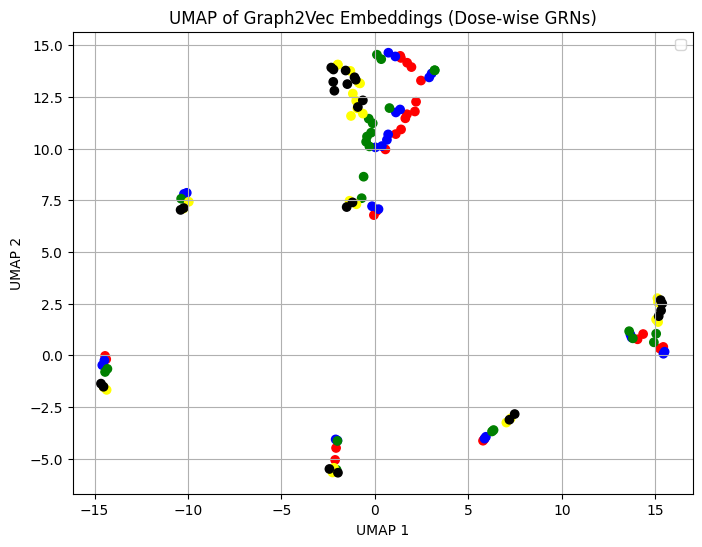

In [51]:
import umap
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='euclidean', random_state=42)
embedding_2d = reducer.fit_transform(X_doses)
print(embedding_2d.shape)

plt.figure(figsize=(8,6))
plt.scatter(embedding_2d[:,0], embedding_2d[:,1], c=dose_labels)
plt.legend()
plt.title("UMAP of Graph2Vec Embeddings (Dose-wise GRNs)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True)
plt.show()

/tmp/ipykernel_3860490/2135504035.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mi_matrix[i, j] = mutual_info_regression(X_doses[:, [i]], X_doses[:, j])
/tmp/ipykernel_3860490/2135504035.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mi_matrix[i, j] = mutual_info_regression(X_doses[:, [i]], X_doses[:, j])
/tmp/ipykernel_3860490/2135504035.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mi_matrix[i, j] = mutual_info_regression(X_doses[:, [i]], X_doses

Text(0.5, 1.0, 'Pairwise Mutual Information')

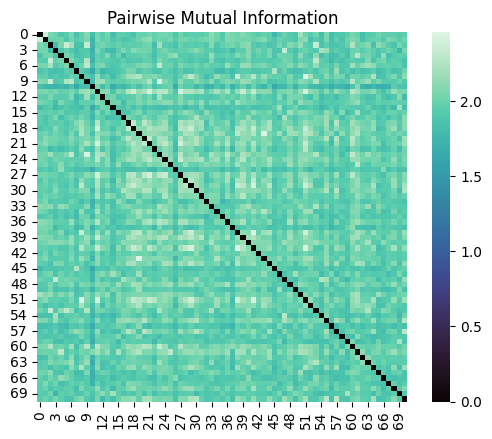

In [7]:
from sklearn.feature_selection import mutual_info_regression

mi_matrix = np.zeros((X_doses.shape[1], X_doses.shape[1]))
for i in range(X_doses.shape[1]):
    for j in range(X_doses.shape[1]):
        if i != j:
            mi_matrix[i, j] = mutual_info_regression(X_doses[:, [i]], X_doses[:, j])

sns.heatmap(mi_matrix, cmap="mako", square=True)
plt.title("Pairwise Mutual Information")

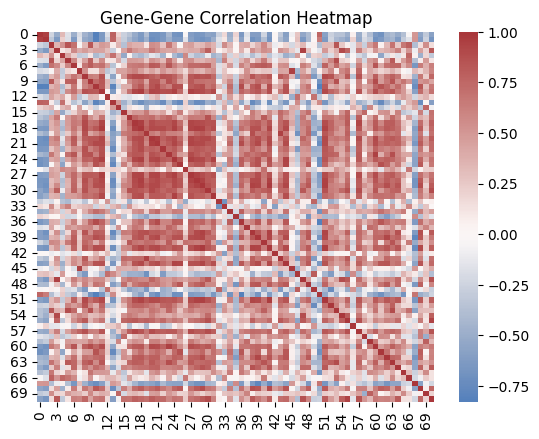

In [8]:
corr = np.corrcoef(X_doses.T)  # X: [samples x genes]
sns.heatmap(corr, cmap="vlag", center=0)
plt.title("Gene-Gene Correlation Heatmap")
plt.show()

In [9]:
print(intersection_de_genes)

{'MVP', 'MYL9', 'APPL1', 'DDX3X', 'EZH2', 'BRD4', 'IRF2BP2', 'HSPA8', 'CHD3', 'TUBB2A', 'SUPT16H', 'TMED9', 'CAV1', 'NUMB', 'S100A11', 'APBB2', 'TAGLN', 'FGF2', 'BRD7', 'POLB', 'MSL2', 'ATP2A2', 'PXN', 'VIM', 'TUBB4B', 'LACTB', 'XRCC6', 'HDAC5', 'PLK3', 'MAPK3', 'TXNRD1', 'CDKN1A', 'PARP1', 'SAE1', 'TNFRSF10B', 'HNRNPUL1', 'NUP88', 'RPL23A', 'HIPK2', 'FOXM1', 'TSPYL2', 'LRPAP1', 'ACTL6A', 'RPA2', 'SKP2', 'SEC31A', 'HSPA9', 'HSP90AB1', 'USP24', 'NQO1', 'EIF3B', 'SDC1', 'PATZ1', 'ZC3H18', 'NFS1', 'CCND1', 'FDXR', 'TSPAN10', 'IKBKB', 'XPO1', 'PPP2R1A', 'GSTM3', 'RPS3', 'TTK', 'SMARCC1', 'HDAC2', 'HSP90AA1', 'GRWD1', 'CCNA1', 'TPR', 'CUL4B', 'PRKACB', 'TSC22D1', 'TRIM22', 'NCL', 'POU2F1', 'HSP90B1', 'CCL2', 'G3BP1', 'LMNB1', 'DDX5', 'CD82', 'CABLES1', 'TFAP4', 'YEATS4', 'NAE1', 'SP1', 'PTPN13', 'YAP1', 'PTK7', 'BCOR', 'RBBP6', 'TRRAP', 'NOL3', 'TIAM1', 'CITED2', 'DHX9', 'PRKAA1', 'EIF3E', 'CYFIP2', 'PMAIP1', 'CRYAB', 'MAP4', 'PLOD3', 'EEF2', 'SLC2A1', 'PRKD1', 'RBCK1', 'S100A16', 'FGF1', '

In [10]:
# Analyse the partition for key genes
celltype="rpe1"
important_genes = pd.read_csv("./data/prior_knowledge/radiation_genes.txt", sep=' ', header=None).iloc[:,0]
#important_genes = important_genes.iloc[0:10,0]
dag_gnn_important_genes = ["radiation", "BCL2A1", "FOXS1", "NUPR1", "EGR2"]
print(list(important_genes.values))
doses = ["A", "B", "C", "D", "E"]
all_data = []
for i, d in enumerate(doses):
    print(d)
    df = pd.read_csv(f"data/{celltype}/cd_tpm_matrix_d{d}.csv")
    all_data.append(df)
    with open(f"./data/{celltype}/cd_partition_d{d}_new.pickle", 'rb') as f:
        custom_partition = pickle.load(f)
    for i, comm in custom_partition.items():
        comm += ['radiation']
        if i==0:
            key_genes_in_comm= list(set(important_genes).intersection(set(comm)))#[gene for gene in important_genes if gene in comm]
            print(f"Key genes in comm {key_genes_in_comm}")
            local_df = df[comm]
            variance = np.var(np.log1p(local_df.to_numpy()),axis=0)
            filtered_inds = np.where(variance>0.05)
            filtered_genes = local_df.columns[filtered_inds]
            key_genes_in_filtered_genes = [gene for gene in key_genes_in_comm if gene in filtered_genes]
            print(f"Key genes with variance > 0.05 {key_genes_in_filtered_genes}")
            for gene, var in zip(comm, variance):
                if gene in key_genes_in_comm:
                    print(f"Key gene {gene}, variance {var}")
                if gene in dag_gnn_important_genes:
                    print(f"DAG_GNN key gene {gene}, variance {var}")
        

['TP53', 'MYC', 'FOS', 'BCL2', 'NFYB', 'E2F4', 'B2M', 'EGR2', 'CDKN1A', 'GADD45A', 'ATM', 'ATR', 'SOD2', 'GPX1', 'HMOX1', 'BAX', 'CASP3', 'ILB', 'IL6', 'IL8', 'IL33', 'TNF', 'TNFAIP3', 'TNF-alpha', 'NFKB1', 'EGR1', 'RAD51', 'MDM2', 'XPC', 'DDB2', 'TGF-beta-1', 'CXCL2', 'CXCL3', 'CXCL4', 'GDF15', 'FDXR', 'FAS', 'PTGS2', 'FGF2', 'POU5F1', 'MMP1', 'MMP3', 'DKK1', 'SERPINB2', 'IL1A', 'IL1B', 'LIF', 'MMP10', 'ATF3', 'BCL2A1', 'MT1E', 'KDM5B', 'BMP2', 'KYNU', 'LAMB3', 'ETS1']
A
Key genes in comm ['CDKN1A', 'B2M', 'MYC', 'ATM', 'BAX', 'ATF3', 'TNFAIP3', 'NFYB', 'PTGS2', 'ETS1', 'SOD2', 'FGF2', 'XPC', 'MDM2', 'FOS', 'TP53', 'FAS', 'GADD45A', 'FDXR', 'EGR1', 'BCL2', 'DKK1', 'CASP3']
Key genes with variance > 0.05 ['CDKN1A', 'PTGS2', 'FOS', 'FDXR', 'EGR1', 'DKK1']
Key gene B2M, variance 0.022145797187015724
Key gene XPC, variance 0.02385820570728553
Key gene ATF3, variance 0.0025795466416225956
Key gene ATM, variance 0.012304958048955822
Key gene FDXR, variance 0.05461961959888417
Key gene FOS, 

In [11]:
all_data_df = pd.concat(all_data)
important_genes = pd.read_csv("./data/prior_knowledge/radiation_genes.txt", sep=' ', header=None).to_numpy()

print(all_data_df.shape)
variance = np.nanvar(np.log1p(all_data_df.to_numpy()),axis=0)
for i, col in enumerate(all_data_df.columns):
    if col in important_genes: # and variance[i] > 0.05:
        print(f"Gene {col} has variance {variance[i]} across doses")
    

(180, 9739)
Gene ATF3 has variance 0.0026046357720705526 across doses
Gene ATM has variance 0.015155160874649156 across doses
Gene B2M has variance 0.030131373759895733 across doses
Gene BAX has variance 0.011002492916956706 across doses
Gene BCL2 has variance 0.004895505430226602 across doses
Gene BMP2 has variance 0.11820796677216394 across doses
Gene CASP3 has variance 0.008974642333223601 across doses
Gene CDKN1A has variance 0.12651223331657876 across doses
Gene DKK1 has variance 0.09715175518588455 across doses
Gene EGR1 has variance 1.1151459953663754 across doses
Gene ETS1 has variance 0.020793369757941847 across doses
Gene FAS has variance 0.03007680755544883 across doses
Gene FDXR has variance 0.052297640120774355 across doses
Gene FGF2 has variance 0.019941000440433357 across doses
Gene FOS has variance 0.17410688952320336 across doses
Gene GADD45A has variance 0.05381779063299328 across doses
Gene GPX1 has variance 0.01142033456219037 across doses
Gene HMOX1 has variance 0.

In [2]:
import networkx as nx
celltype='huvec'
for dose in ["A", "B", "C", "D", "E"]:
    # G = nx.read_gexf(f"./data/huvec/cd_subgraph_d{dose}.gexf")
    df = pd.read_csv(f"data/{celltype}/cd_matrix_d{dose}.csv")
    variance = np.var(np.log1p(df.to_numpy()),axis=0)
    variance_map = dict(zip(df.columns, variance))
    # nx.set_node_attributes(G, variance_map, name='variance')
    # nx.write_gexf(G, f"./data/huvec/cd_var_subgraph_d{dose}.gexf")
    
    #G = nx.read_gexf(f"./data/huvec/bootstrap_graphs2/cd_dag_gnn_d{dose}.gexf")
    with open(f"./data/{celltype}/cd_partition_d{dose}_new.pickle", 'rb') as f:
        custom_partition = pickle.load(f)
    #genes = custom_partition[0] + ['radiation']
    # edge_prob = np.load(f"./data/huvec/bootstrap_graphs5/edge_prob_dag_gnn_d{dose}.npy")
    # edge_prob[edge_prob<0.5]=0
    # G = nx.from_numpy_array(edge_prob, create_using=nx.DiGraph)
    # G = nx.relabel_nodes(
    #             G,
    #             mapping=dict(zip(np.arange(len(genes)), genes)),
    #             copy=True,
    #         )
    G = nx.read_gexf(f"./data/huvec/bootstrap_graphs6/cd_dag_gnn_d{dose}.gexf")
    genes = G.nodes()
    nx.set_node_attributes(G, dict(zip(genes, [variance_map[node] for node in genes])), name='variance')
    nx.write_gexf(G, f"./data/huvec/bootstrap_graphs6/cd_var_dag_gnn_d{dose}.gexf")


